## 1) Regressão linear

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("datasets/house_prices.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# target
y = df["SalePrice"]
# features
X = df.drop(columns = ["Id", "SalePrice"])

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

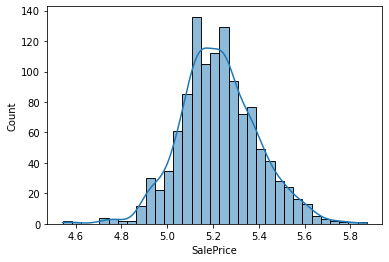

In [6]:
# Olhando y_train

sns.histplot(np.log10(y_train), kde = True)
plt.show()

### Modelo de Regressão Linear

In [7]:
# X com uma feature tem que ser reshape
X_train_1d = X_train["GrLivArea"].values.reshape(-1, 1)
X_train_1d

array([[1314],
       [1571],
       [ 796],
       ...,
       [ 864],
       [1426],
       [1555]], dtype=int64)

In [8]:
from sklearn.linear_model import LinearRegression

reglin = LinearRegression()
reglin.fit(X_train_1d, y_train)

LinearRegression()

In [9]:
vars(reglin)

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([102.48895892]),
 '_residues': 3595239550906.284,
 'rank_': 1,
 'singular_': array([17915.34517326]),
 'intercept_': 24899.74815733818}

In [10]:
# b0
reglin.intercept_

24899.74815733818

In [11]:
# b1 (multiplica a variável)
reglin.coef_

array([102.48895892])

### Função de perda
É uma função que contabiliza os **erros cometidos pelo mundo**. E para sabermos se um modelo está errando muito é: **comparar o target predito (y_pred) com o target real (y_test)**. A função de perda mais comum é:

$$\text{SE}= (y_i-\hat{y}_i)^2$$

Onde $i = 1, 2, \cdots, n$ é um índice que identifica cada uma das $n$ observações de treino.

Obs.: se tomarmos a média do SE em toda a base de treino, temos o **Mean Squared Error** (MSE):

$$\text{MSE} = \frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

A função de perda é dependente da função de hipótese e dos dados de treino.

Uma vez que temos uma função de perda, nosso objetivo passa a ser **minimizá-la**. Assim, o objetivo é encontrar o vetor de parâmetros ($\hat{b}$) que minimiza a função de perda nos dados de treino, ou seja:

$$\hat{b} = \operatorname*{argmin}_b \left( \mathcal{L}_{H, \vec{b}}(X_i, y_i) \right)$$

### Avaliação do modelo

Aqui comparamos targets reais com targets preditos (resíduos)

In [12]:
X_test_1d = X_test["GrLivArea"].values.reshape(-1, 1)
y_pred = reglin.predict(X_test_1d)

In [13]:
# R2 score
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.5542632452871117

Uma das premissas de regressão linear é que os resíduos sejam normalmente distribuídos. Se esse não for o caso, pode ser importante que você reveja se a regressão linear de fato é um modelo adequado ao seu problema.

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

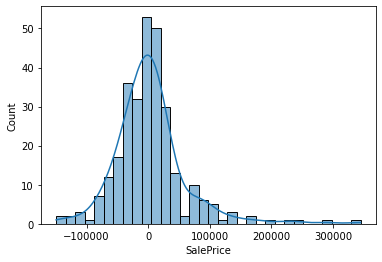

In [14]:
residuos = y_test - y_pred
sns.histplot(residuos, kde = True)

##### As principais métricas de avaliação do modelo de regressão linear são:

**Mean Absolute Error (MAE)**: média do valor absoluto de todos os resíduos:
$$\frac{1}{n} \sum_{i = 1}^{n}|{y_i - \hat{y}_i}|$$

**Mean Squared Error (MSE)**: média dos erros quadrados:
$$\frac{1}{n} \sum_{i = 1}^{n}({y_i - \hat{y}_i})^2$$

**Root Mean Squared Error (RMSE)**: raiz quadrada da média dos erros quadrados:
$$\sqrt{\frac{1}{n} \sum_{i = 1}^{n}({y_i - \hat{y}_i})^2}$$

**Mean Absolute percentage Error (MAPE)**: erro absoluto médio relativo ao valor real dos targets:
$$\frac{1}{n} \sum_{i = 1}^{n}|\frac{y_i - \hat{y}_i}{y_i}|$$

Comparando as métricas: 
- **MAE**: é mais simples de entender, mas penaliza mais erros menores. Cada erro contribui com MAE em proporção ao valor absoluto do erro. Comparado com outros erros, valores menores tem mais contribuição com o erro do que a sua contraparte em relação ao quadrado. Compare com o valor distribuindo ao longo do eixo x, o resíduo varia linearmente, na qual erros menores tem mais relevância se o erro for elevado ao quadrado (dado x<1, x > x²).

- **MSE**: é a métrica mais popular, na qual penaliza erros maiores, fazendo mais sentido em aplicaçõs reais.

- **RMSE**: é ainda mais popular, pois a métrica tem mesma unidade que o target

- **MAPE**: penaliza mais residuos negativos (isto é, erros para cima) do que resíduos positivos (erros para baixo).

$y_i = 100$ e $\hat{y}_i = 150$ (erro para cima do valor real). Temos $MAPE = |\frac{100-150}{100}|=0.50$. Se o valor real é 100, mas eu previ 150 (target predito) sou penalizado

$y_i = 200$ e $\hat{y}_i = 150$ (erro para baixo do valor real). Temos $MAPE = |\frac{200-150}{200}|=0.25$. Se o valor real é 200, mas eu previ 150, sou penalizado menos

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
# print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred):.2f}")

MAE: 38341.20
RMSE: 58471.76
MAPE: 0.23


In [16]:
def plot_scatter_real_pred(y_test, y_pred):
    
    x = np.linspace(0, y_test.max())
    y = x

    plt.title("Target real x target predito")
    
    plt.plot(x, y, color="red", ls=":")

    sns.scatterplot(x=y_test, y=y_pred)

    plt.xlabel("Real")
    plt.ylabel("Predito")

    plt.show()

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

def reg_lin_pt1_pt2(X_train, y_train, X_test, y_test, plot=True):

    # ===============================
    # passo 1 - construção do modelo

    reglin = LinearRegression()

    reglin.fit(X_train, y_train)

    # ===============================
    # passo 2 - avaliação do modelo

    y_pred = reglin.predict(X_test)
    
    print("\nMétricas de avaliação (dados de teste):\n")

    if plot:
        plot_scatter_real_pred(y_test, y_pred)

    print(f"R^2: {r2_score(y_test, y_pred):.2f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
    print(f"MAPE: {(mean_absolute_percentage_error(y_test, y_pred))*100:.2f}%")

    residuos = y_test - y_pred
    print("\nDistribuição dos resíduos:\n")
    print(residuos.describe())
    
    if plot:
        sns.histplot(residuos, kde=True)
        plt.show()


Métricas de avaliação (dados de teste):



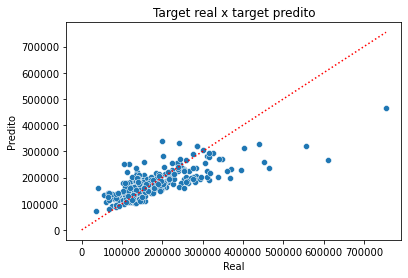

R^2: 0.55
MAE: 38341.20
RMSE: 58471.76
MAPE: 23.34%

Distribuição dos resíduos:

count       292.000000
mean       3515.754922
std       58466.163367
min     -149347.637583
25%      -30951.653433
50%       -2718.855323
75%       21621.209371
max      344473.352964
Name: SalePrice, dtype: float64


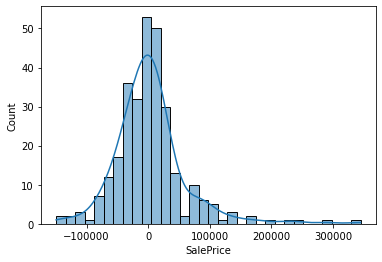

In [19]:
reg_lin_pt1_pt2(X_train["GrLivArea"].values.reshape(-1, 1), y_train, 
                X_test["GrLivArea"].values.reshape(-1, 1), y_test,
                plot=True)

## Regressão logística

A [Regressão Logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) (também chamado de **logit**), apesar do nome, é um método que aplicaremos a problemas de classificação!

O objetivo da regressão logística é: **modelar a probabilidade $P(\vec{x})$ de dada observação (com features $\vec{x}$) pertencer a uma das classes (que comumente chamamos de classe 1)**, ou seja, queremos modelar:

$$ P( y = 1 | \vec{x}) $$

Naturalmente, $0 \le P(\vec{x}) \le 1$. 

> Lembre-se que: $ P( y = 0 | \vec{x}) = 1 - P( y = 1 | \vec{x}) $

Uma vez que tivermos uma função que modele a probabilidade acima, podemos tomar a decisão de classificação da seguinte maneira:

- $P(\vec{x}) \ge 0,5$: x pertence à classe 1
- $P(\vec{x}) < 0.5$: x pertence à classe 0

Obs.: este valor de 0.5 (50%) é chamado de "cutoff", e pode ser ajustado, embora o default fixá-lo em 50%!

> É justamente através do cutoff que tomamos uma decisão discreta (classificação) a partir de um método de regressão!

Note que:

- $z \in \mathbb{R}$
- $0 \le \phi(z) \le 1$

Para incorporar a ideia da regressão linear na regressão logística, tomamos:

- $z = b_0 + b_1x$, que é o modelo de regressão linear (uma variável);

E substituímos na função logística:

- $\phi(x) = \frac{1}{1 + e^{-(b_0 + b_1 x)}}$

Com isso, tomamos qualquer output real do modelo linear e transformamos em um valor entre 0 e 1, como queríamos!

<img src="https://s3-sa-east-1.amazonaws.com/lcpi/e5ecf372-6790-49db-9bad-95bc4b19df27.png" width="500">

No nosso caso, como queremos modelar probabilidades, a função acima é exatamente a **hipótese** do estimador de regressão logística! Isto é,

$$f_{H, \vec{b}}(x) = P(x) = \frac{1}{1 + e^{-(b_0 + b_1 x)}}$$

Ou, para a regressão logística múltipla com $p$ features $\vec{x} = x_1, \cdots, x_p$:

$$f_{H, \vec{b}}(\vec{x}) = P(\vec{x}) = \frac{1}{1 + e^{-(b_0 + b_1 x_1 + \cdots + b_p x_p)}}$$

No fim, temos que a predição é tomada em termos do cutoff $\alpha$, e, com isso, chegamos no $\hat{y}$:

$$\hat{y} = \left\{\begin{matrix}
1, \text{se } P(\vec{x}) \geq \alpha\\  
0, \text{se } P(\vec{x}) < \alpha
\end{matrix}\right.$$

Note, portanto, que apesar da hipótese ser uma função não linear, **a fronteira de decisão** é linear, sendo definida pela função por partes acima, com base no cutoff e na probabilidade!

Com um pouco de álgebra, é possível mostrar que: 

$ b_0 + b_1 x_1 + \cdots + b_p x_p = \log \left ( \frac{P}{1-P} \right ) $

A quantidade $\frac{P}{1-P}$ é conhecida como **odds/chance**; e $\log \left ( \frac{P}{1-P} \right )$ é o [log-odds ou logit](https://en.wikipedia.org/wiki/Logit).

Note, portanto, que podemos entender a regressão logística como um modelo em que **o logit é linear com as features**. 

> Portanto, esse fato e o anterior fazem com que, de fato, a regressão logística seja um **um modelo linear**.

Na regressão logística, nosso conjunto de hipóteses é: $\mathcal{H} = \left \{ \frac{1}{1 + e^{-(b_0 + b_1 x_1 + \cdots + b_p x_p)}} \right \}$.

O objetivo do algoritmo de aprendizagem será, como sempre, determinar qual é o vetor de parâmetros $\vec{b}$ que produz uma função logística que **melhor se ajusta aos dados**.

Para ilustrar este ponto novamente, vamos produzir a seguir algumas das infinitas funções de $\mathcal{H}$:

In [20]:
df = pd.read_csv("datasets/advertising.csv")

In [22]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [21]:
df["Clicked on Ad"].unique()

array([0, 1], dtype=int64)

### Função de perda e algoritmo de aprendizagem

A função de perda para a regressão logística é a famosa [binary cross-entropy](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a), também conhecida como [log loss](https://developers.google.com/machine-learning/crash-course/logistic-regression/model-training)

Esta função será de enorme importância no estudo de **redes neurais**.

As principais implementações do algoritmo de aprendizagem da regressão logística se baseia no [método de máxima verossimilhança](https://pt.wikipedia.org/wiki/M%C3%A1xima_verossimilhan%C3%A7a). 

Para maiores detalhes sobre o algoritmo de aprendizagem, veja [este vídeo](https://youtu.be/yIYKR4sgzI8) e [esta série de vídeos](https://youtu.be/vN5cNN2-HWE), do ótimo canal StatQuest!

In [24]:
# Consideraremos apenas as features numéricas
df_model = df.select_dtypes('number')

X = df_model.drop(columns = ["Clicked on Ad"])
y = df_model["Clicked on Ad"]

In [26]:
# train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

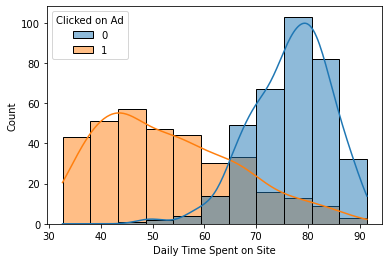

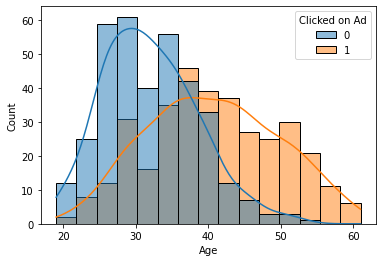

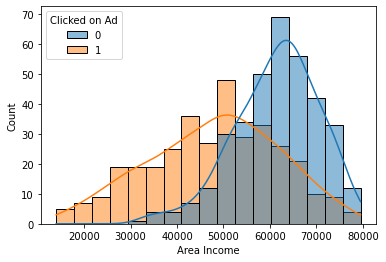

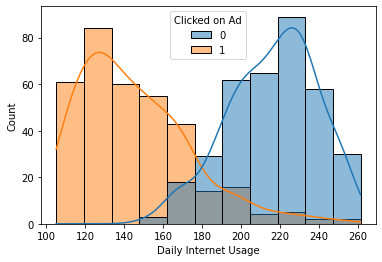

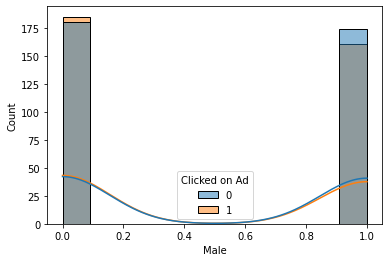

In [27]:
for col in X_train:
    
    sns.histplot(data=X_train, x=col, kde=True, hue=y_train)
    plt.show()

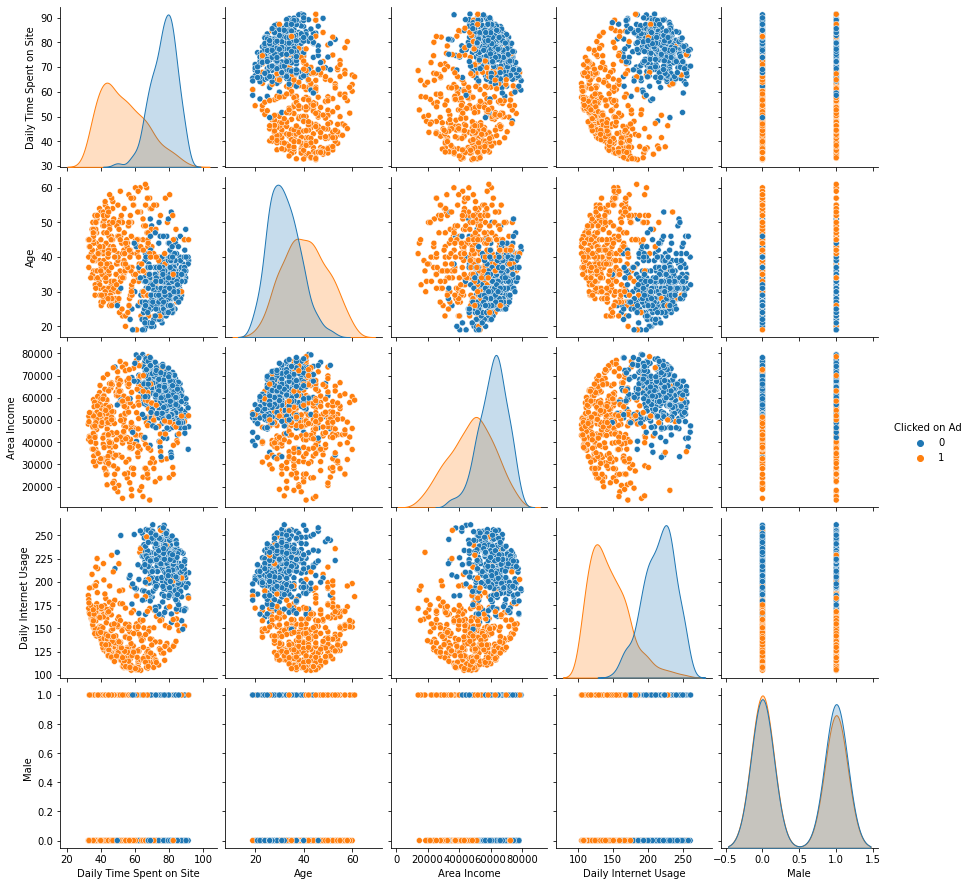

In [29]:
sns.pairplot(data=pd.concat([X_train, y_train], axis=1), hue="Clicked on Ad")

In [30]:
# Treinando o modelo
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression().fit(X_train, y_train)

__Modelo treinado!__

$$f_{H, \vec{b}}(\vec{x}) = P(y=1 | \vec{x}) = \frac{1}{1 + e^{-(b_0 + b_1 x_1 + \cdots + b_p x_p)}}$$

Vamos ver os parâmetros do modelo:

In [31]:
# b0
logit.intercept_

array([0.00549774])

In [32]:
# Quais são as features representadas pelo vetor b 
logit.feature_names_in_

array(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male'], dtype=object)

In [33]:
# e quais são os ceoficientes do vetor b
logit.coef_

array([[-5.61839608e-02,  2.65933604e-01, -1.62153396e-05,
        -2.74019904e-02,  2.26459439e-03]])

Lembre-se que, diferentemente da regressão linear, devido ao fato da função logística ser uma exponencial, a variação de $P(x)$ depende de x, e não apenas dos coeficientes! Então, a interpretação dos coeficientes não é tão imediata. 

Mas, os sinais carregam significado. Para um coeficiente:
- positivo ($b_i > 0$), temos que um aumento em x levará a um aumento de $P(x)$;
- negativo ($b_i < 0$), temos que um aumento em x levará a uma diminuição de $P(x)$

Mas, a variacão de $P(x)$ em si, depende do valor de x!

### Olhando as features de teste (X_test) e y_test

In [34]:
X_test.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
521,63.26,29,54787.37,120.46,1
737,71.23,52,41521.28,122.59,0
740,43.63,38,61757.12,135.25,1
660,42.04,49,67323.00,182.11,0
411,78.68,29,66225.72,208.05,0


In [36]:
y_test.values

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0], d

In [37]:
# Fazendo o predict
y_pred = logit.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0], d

Além dos coeficientes do modelo, algo muito interessante que a classe do sklearn proporciona é o método `predict_proba()`

Esse método retorna exatamente qual é a **probabilidade modelada pelo logit**, isto é, $P(y=1 | \vec{x})$.

Isso pode ser muito útil, pois assim conseguimos **mudar qual é o cutoff de escolha de classe** para ser algo diferente de 0.5!

In [39]:
logit.classes_

array([0, 1], dtype=int64)

In [44]:
# Probabilidade de sair '1'
proba_1 = logit.predict_proba(X_test)[:,1]
proba_1

array([0.49410025, 0.99698029, 0.95047109, 0.98997332, 0.02994942,
       0.28464876, 0.02335017, 0.9907872 , 0.30860051, 0.94813735,
       0.01919735, 0.90909212, 0.997276  , 0.02429419, 0.9183723 ,
       0.99370979, 0.99882214, 0.96751416, 0.09274758, 0.99030392,
       0.09268451, 0.98672753, 0.99409177, 0.01509856, 0.02007698,
       0.99542744, 0.00868694, 0.01493379, 0.99084538, 0.73086728,
       0.01734306, 0.66911626, 0.03584758, 0.8573595 , 0.997888  ,
       0.07094887, 0.02461643, 0.11133782, 0.86523818, 0.97959959,
       0.01437515, 0.91892115, 0.02391152, 0.98400654, 0.01248475,
       0.10086657, 0.99234791, 0.99845486, 0.02367448, 0.99692979,
       0.98052868, 0.00837814, 0.88394612, 0.01231046, 0.11157469,
       0.06685049, 0.13627378, 0.99812281, 0.02493854, 0.96120836,
       0.07747096, 0.99114106, 0.10872861, 0.97161792, 0.87781922,
       0.97446748, 0.99854467, 0.06350515, 0.70507127, 0.95100256,
       0.97279199, 0.50131127, 0.1279694 , 0.0508204 , 0.84115

In [45]:
# Probabilidade de sair '0'
proba_0 = logit.predict_proba(X_test)[:,0]
proba_0

array([5.05899747e-01, 3.01971071e-03, 4.95289102e-02, 1.00266761e-02,
       9.70050585e-01, 7.15351236e-01, 9.76649834e-01, 9.21280366e-03,
       6.91399492e-01, 5.18626496e-02, 9.80802654e-01, 9.09078753e-02,
       2.72400259e-03, 9.75705812e-01, 8.16276978e-02, 6.29021287e-03,
       1.17786190e-03, 3.24858449e-02, 9.07252415e-01, 9.69607953e-03,
       9.07315493e-01, 1.32724713e-02, 5.90823356e-03, 9.84901444e-01,
       9.79923019e-01, 4.57255934e-03, 9.91313062e-01, 9.85066207e-01,
       9.15462235e-03, 2.69132722e-01, 9.82656936e-01, 3.30883738e-01,
       9.64152419e-01, 1.42640498e-01, 2.11199720e-03, 9.29051130e-01,
       9.75383574e-01, 8.88662178e-01, 1.34761816e-01, 2.04004115e-02,
       9.85624846e-01, 8.10788481e-02, 9.76088476e-01, 1.59934623e-02,
       9.87515250e-01, 8.99133432e-01, 7.65209110e-03, 1.54513882e-03,
       9.76325521e-01, 3.07020894e-03, 1.94713174e-02, 9.91621862e-01,
       1.16053875e-01, 9.87689544e-01, 8.88425308e-01, 9.33149511e-01,
      

In [46]:
# usamos o np.where para definir cutoffs
cutoff = 0.7
np.where(proba_1 >= cutoff, 1, 0)

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

#### Não confunda o np.where() que é similar à função if do excel com pd.where(cond, other) do pandas, na qual se cond é satisfeita, o valor se mantém e caso seja falso, troca-se por other

# Métricas de avaliação

In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



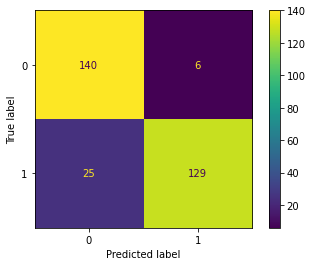

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)